In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#grabbing cleaned state data from Repo
allbystate_path = "../George/Resources/AllByState.csv"
allbystate_df = pd.read_csv(allbystate_path)
allbystate_df

dates = ['2020-01-01', '2020-01-15', '2020-02-01', '2020-02-15',
         '2020-03-01', '2020-03-15', '2020-04-01', '2020-04-15',
         '2020-05-01', '2020-05-15', '2020-06-01', '2020-06-15',
         '2020-07-01', '2020-07-15']

In [3]:
#setting variable for date to replicate plots and calculations below for dates in series
date = "2020-07-15"
date_snapshot = allbystate_df.loc[allbystate_df["Date"]==date,:]
date_snapshot

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
8,57856,59067,2020-07-15,1211,0.0205,0,Alabama,AL,49481.34,4846150.0,97.938940,26883.102656,41750.0
17,1614,1631,2020-07-15,17,0.0104,0,Alaska,AK,211300.81,734417.0,3.475694,35617.249121,51875.0
26,128920,131354,2020-07-15,2434,0.0185,0,Arizona,AZ,89709.56,6940873.0,77.370494,29270.505603,49063.0
35,29962,30297,2020-07-15,335,0.0111,0,Arkansas,AR,49590.60,2977621.0,60.044061,25666.556534,40574.0
44,347510,354885,2020-07-15,7375,0.0208,0,California,CA,96922.44,39076841.0,403.176406,35049.472573,65231.0
53,36393,38137,2020-07-15,1744,0.0457,0,Colorado,CO,97067.89,5514222.0,56.807890,36469.426840,59610.5
62,43256,47636,2020-07-15,4380,0.0919,0,Connecticut,CT,4829.57,3569498.0,739.092300,43172.210523,86324.0
71,12529,13050,2020-07-15,521,0.0399,0,Delaware,DE,1945.37,943604.0,485.051173,34155.262572,61657.0
80,297289,301810,2020-07-15,4521,0.0150,0,Florida,FL,43794.02,20568602.0,469.666909,30222.615661,51245.5
89,124747,127838,2020-07-15,3091,0.0242,0,Georgia,GA,54620.06,10269257.0,188.012554,29577.560409,45659.5


In [4]:
#statistical summary for the Deaths on a given Date
date_total_deaths = date_snapshot["Deaths"].sum()
date_mean = date_snapshot["Deaths"].mean()
date_median = date_snapshot["Deaths"].median()
date_variance = date_snapshot["Deaths"].var(ddof=0)
date_std = date_snapshot["Deaths"].std(ddof=0)
date_sem = date_snapshot["Deaths"].sem()

#calculating outliers
quartiles = date_snapshot["Deaths"].quantile([.25,0.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f" The total deaths related to Covid-19 across the U.S. on {date} is {date_total_deaths}")
print(f" The average deaths across the U.S. on {date} is {date_mean}")
print(f" The median deaths across the U.S. on {date} is {date_median}")
print(f" The variance of deaths across the U.S. on {date} is {round(date_variance,2)}")
print(f" The standard deviation deaths across the U.S. on {date} is {round(date_std,2)}")
print(f" The standard error of the mean of deaths across the U.S. on {date} is {round(date_sem,2)}")
print(f" The lower bound of deaths that may indicate outliers is {round(lower_bound,2)}")
print(f" The upper bound of deaths that may indicate outliers is {round(upper_bound,2)}")


 The total deaths related to Covid-19 across the U.S. on 2020-07-15 is 136649
 The average deaths across the U.S. on 2020-07-15 is 2732.98
 The median deaths across the U.S. on 2020-07-15 is 992.5
 The variance of deaths across the U.S. on 2020-07-15 is 26452576.46
 The standard deviation deaths across the U.S. on 2020-07-15 is 5143.21
 The standard error of the mean of deaths across the U.S. on 2020-07-15 is 734.74
 The lower bound of deaths that may indicate outliers is -3894.88
 The upper bound of deaths that may indicate outliers is 7276.12


y = 0.14x + -4982.44
The correlation between Median Household Income & Covid-19 Deaths as of 2020-07-15 is 0.32


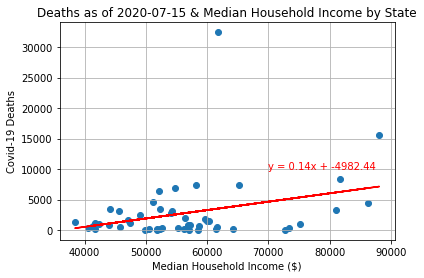

In [5]:
#Creating Scatterplot & calculating correlation of latest Coronavirus Death data to plot with Median Household Income
snapshot_df = date_snapshot[["Date", "Deaths", "State","Median Household Income", "Per Capita Income"]]
snapshot_df

deaths = snapshot_df["Deaths"]
median_hi = snapshot_df["Median Household Income"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(median_hi, deaths)
regress_values = median_hi * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(median_hi, deaths)
plt.plot(median_hi, regress_values, 'r-')
plt.annotate(line_eq, (70000,10000), fontsize=10, color='red')
plt.xlabel("Median Household Income ($)")
plt.ylabel(f"Covid-19 Deaths")
plt.title(f"Deaths as of {date} & Median Household Income by State")
plt.grid(True)

correlation = st.pearsonr(median_hi, deaths)

print(line_eq)
print(f"The correlation between Median Household Income & Covid-19 Deaths as of {date} is {round(correlation[0],2)}")
plt.savefig("Covid_Deaths_and_Median_Income_Plot.png")
plt.show()

y = 0.44x + -11387.36
The correlation between Per Capita Income & Covid-19 Deaths as of 2020-07-15 is 0.39


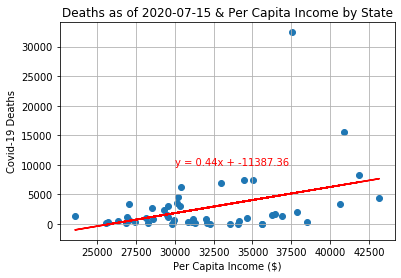

In [6]:
#scatterplot & corrrelation of deaths but with per capita income
deaths = snapshot_df["Deaths"]
per_cap = snapshot_df["Per Capita Income"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(per_cap, deaths)
regress_values = per_cap * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(per_cap, deaths)
plt.plot(per_cap, regress_values, 'r-')
plt.annotate(line_eq, (30000,10000), fontsize=10, color='red')
plt.xlabel("Per Capita Income ($)")
plt.ylabel(f"Covid-19 Deaths")
plt.title(f"Deaths as of {date} & Per Capita Income by State")
plt.grid(True)

correlation = st.pearsonr(per_cap, deaths)

print(line_eq)
print(f"The correlation between Per Capita Income & Covid-19 Deaths as of {date} is {round(correlation[0],2)}")
plt.savefig("Covid_Deaths_And_Per_Cap_Income_Plot.png")
plt.show()